1. Import libraries
     a. Define Path & Import dataframes
2. Look for Personally Identifiable Information (PII)
3. Create a Regional Segmentation
    a. Review difference in spending habits across regions
4. Create an exclusion flag for low-activity customers
5. Create a profiling variable
    a. Include age, income, department_id, dependants 
6. Create Visualizations
7. Create customer-level profiles
8. Aggregate max, mean, min variables on a customer-profile level for usage & expenditure
9. Compare customer profiles with regions and departments
    a. Is there a link?

# 1. Import Libraries; define path & import dataframes

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#shortcut the main file to path
path = r'C:\Users\dodge\24-06-2023 Instacart Basket Analysis'

In [3]:
#Import new merged file
df_all=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Orders_products_all.pkl'))

# 2. Look for Personally Identifiable Information (PII) 

In [7]:
#Display all columns to look for PII
df_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,Gender,State,Age,date_joined,dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


The only identifiable information is first and last name (although either alone are not necessarily identifiable).  There are no email addresses, date of birth, or address/phone numbers listed.  In reviewing the project brief, the identity of specific customers is not needed.  After discussing with a senior analyst, we will drop those columns from this dataframe version.

In [4]:
#Drop the first_name column
df_all = df_all.drop(columns = ['first_name'])

In [5]:
#Drop the last_name column
df_all = df_all.drop(columns = ['last_name'])

In [6]:
#Check the output
df_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_order,frequency_flag,Gender,State,Age,date_joined,dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
#Allow all columns to be shown to ensure no hidden PII
pd.options.display.max_columns=None

In [8]:
df_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest_day,Busiest_period_of_day,max_order,loyalty_flag,ave_spend,spending_flag,median_order,frequency_flag,Gender,State,Age,date_joined,dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


# 3. Create a Regional Segmentation; Review difference in spending habits across regions

In [6]:
#Identify four region groups by including specified states into each region
Notheast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [7]:
#Create a flag for identifying which region each purchase is in
df_all.loc[df_all['State'].isin(Notheast), 'Region'] = 'Northeast'
df_all.loc[df_all['State'].isin(Midwest), 'Region'] = 'Midwest'
df_all.loc[df_all['State'].isin(South), 'Region'] = 'South'
df_all.loc[df_all['State'].isin(West), 'Region'] = 'West'

In [12]:
#Review the output
df_all['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [13]:
#Compare to shape of entire dataframe
df_all.shape

(32404859, 31)

Equal # of rows indicating all captured in region identification.

Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [14]:
#Create a crosstab between regions and spending flag
crosstab = pd.crosstab(df_all['Region'], df_all['spending_flag'], dropna=False)

In [15]:
#Review the outcome
crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [8]:
#Due to RAM issues, saving file with PII removed and regions created; will stop kernel and restart revised dataframe
df_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_1.pkl'))

In [3]:
#Import Revised dataframe without PII and with regions created
df_all_1=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_1.pkl'))

# 4. Create an exclusion flag for low-activity customers

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [4]:
#Review shape and columns of current dataframe
df_all_1.shape

(32404859, 31)

In [6]:
#Allow all columns to be shown to ensure no hidden PII
pd.options.display.max_columns=None

In [7]:
df_all_1.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest_day,Busiest_period_of_day,max_order,loyalty_flag,ave_spend,spending_flag,median_order,frequency_flag,Gender,State,Age,date_joined,dependants,fam_status,income,Region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [8]:
#Create an exclusion flag for low-activity customers based on max_order column
df_all_1.loc[df_all_1['max_order'] <= 5, 'activity_loc'] = 'low activity customer'

In [9]:
#Utilize the exclusion flag to identify the high-activity customers
df_all_1.loc[df_all_1['max_order'] >5, 'activity_loc'] = 'high activity customer'

In [11]:
#Review output
df_all_1['activity_loc'].value_counts(dropna=False)

high activity customer    30171424
low activity customer      2233435
Name: activity_loc, dtype: int64

In [12]:
#Create dataframe of only low activity customers
df_low_activity=df_all_1[df_all_1['activity_loc'] == 'low activity customer']

In [13]:
#Validate the created df (should have 2233435 rows)
df_low_activity.shape

(2233435, 32)

In [14]:
#Validate the max order columns is <=5
df_low_activity['max_order'].max()

5

In [15]:
#Export low activity dataframe
df_low_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Low Activity Customers.pkl'))

In [16]:
#Exclude low activity customers from dataframe
df_all_high = df_all_1[df_all_1['activity_loc'] == 'high activity customer']

In [17]:
#Validate the created df (should have 30171424 rows)
df_all_high.shape

(30171424, 32)

In [18]:
#Validate the min order in max_order column is 6
df_all_high['max_order'].min()

6

#Export df_all_1 dataframe
df_all_1.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_1.pkl'))

In [20]:
#Export df_all_high dataframe
df_all_high.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_high.pkl'))

#  5. Create a profiling variable; include age, income, department_id, dependants

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

In [4]:
#Import new merged file
df_all_high=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_high.pkl'))

In [6]:
#Allow all columns to be shown to ensure no hidden PII
pd.options.display.max_columns=None

In [6]:
df_all_high.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest_day,Busiest_period_of_day,max_order,loyalty_flag,ave_spend,spending_flag,median_order,frequency_flag,Gender,State,Age,date_joined,dependants,fam_status,income,Region,activity_loc
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer


# Age Variable

In [8]:
#Analyze the age spread to determine age variables
df_all_high['Age'].describe()

count    3.017142e+07
mean     4.947082e+01
std      1.848772e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

Age range is from 18-81; mean age is 49.5 with and 18.5 year standard deviation.  25th Percentile is 33; 75th percentile is 65. Younger Age will be defined as 18-33; Middle Age will be 34-64; Older Age will be 65+.

In [9]:
#define younger age group
df_all_high.loc[df_all_high['Age'] <= 33, 'age_group_loc'] = 'Younger Age'

In [10]:
#define middle age group
df_all_high.loc[(df_all_high['Age'] >= 34) & (df_all_high['Age'] <= 64), 'age_group_loc'] = 'Middle Age'

In [11]:
#define older age group
df_all_high.loc[df_all_high['Age'] >=65, 'age_group_loc'] = 'Older Age'

In [12]:
#Review the output
df_all_high['age_group_loc'].value_counts(dropna=False)

Middle Age     14623473
Older Age       7989725
Younger Age     7558226
Name: age_group_loc, dtype: int64

In [13]:
df_all_high.shape

(30171424, 33)

# Income Variable

In [7]:
#Analyze the income spread of customers to set income variables
df_all_high['income'].describe()

count    3.017142e+07
mean     9.977020e+04
std      4.318342e+04
min      2.590300e+04
25%      6.742400e+04
50%      9.682300e+04
75%      1.281500e+05
max      5.939010e+05
Name: income, dtype: float64

Minimum income is 25,903; max income is 593,901.  Average (mean) income is 99,770 with a standard deviation of 43,183.  The lowest quartile makes up to 67,424 and the highest quartile makes 128,150+.  Using the average and standard deviation, I will define 'low income' as <56,587; 'median income' as 56,588-142,953.  'High income' as >=142,954.

In [14]:
#Define low income variable
df_all_high.loc[df_all_high['income'] <= 56587, 'income_group_loc'] = 'Low income'

In [15]:
#Define middle income variable
df_all_high.loc[(df_all_high['income'] >56587) & (df_all_high['income'] <= 142953), 'income_group_loc'] = 'Medium income'

In [16]:
#Define high income variable
df_all_high.loc[df_all_high['income'] >142953, 'income_group_loc'] = 'High income'

In [17]:
#Review the outcome
df_all_high['income_group_loc'].value_counts(dropna=False)

Medium income    20415048
High income       5029511
Low income        4726865
Name: income_group_loc, dtype: int64

Export dataframe to save changes

In [18]:
#Export df_all_high dataframe
df_all_high.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_high1.pkl'))

# Department_id Variable

In [3]:
#Import the departments wrangled dataframe to clean it and then merge with main dataframe
df_depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=False)

In [4]:
#Review the dataframe
df_depts

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [4]:
#Rename 'Unnamed' column to match the department_id column in the main dataframe
df_depts=df_depts.rename(columns={'Unnamed: 0' : 'department_id'})

In [6]:
#Review the output
df_depts

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [3]:
#Import main dataframe current version
df_all_high2=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_high1.pkl'))

In [5]:
df_depts


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [6]:
#Export df depts to attempt merge in separate notebook
df_depts.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'dept_names.csv'))

# Dependants Variable

In [4]:
#Review the distribution of dependants
df_all_high2['dependants'].value_counts(dropna=False)

3    7576814
0    7539213
2    7531754
1    7523643
Name: dependants, dtype: int64

In [4]:
#Create two variables only for Has Dependants or No Dependants
df_all_high2.loc[df_all_high2['dependants'] == 0, 'dep_group_loc'] = 'No dependants'

In [5]:
#Create variable for has dependants
df_all_high2.loc[df_all_high2['dependants'] > 0, 'dep_group_loc'] = 'Yes dependants'

In [7]:
#Review the output
df_all_high2.head(10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest_day,Busiest_period_of_day,max_order,loyalty_flag,ave_spend,spending_flag,median_order,frequency_flag,Gender,State,Age,date_joined,dependants,fam_status,income,Region,activity_loc,age_group_loc,income_group_loc,dep_group_loc
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Busiest_day,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,both,Mid-range product,Busiest_day,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,both,Mid-range product,Busiest_day,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants


# 6. Create Visualizations

<Axes: >

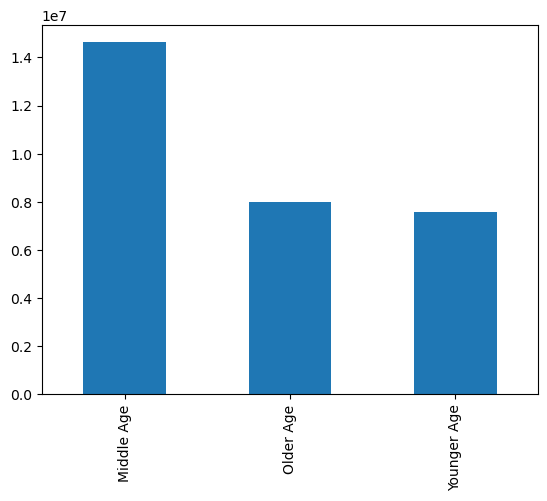

In [17]:
#Create a bar graph showing different age groups
df_all_high2['age_group_loc'].value_counts().plot.bar()

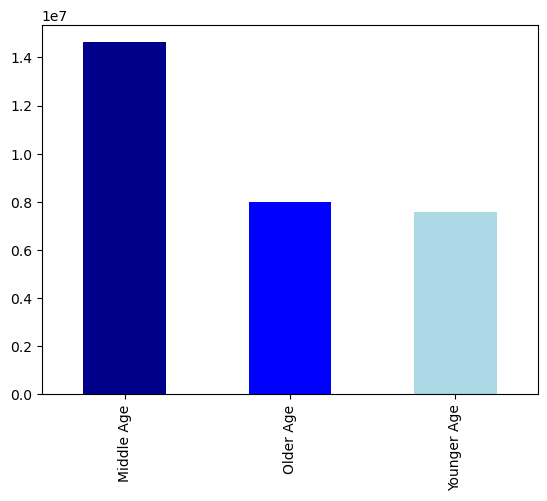

In [20]:
#Add color
age_groups_bar = df_all_high2['age_group_loc'].value_counts().plot.bar(color = ['darkblue', 'blue', 'lightblue'])

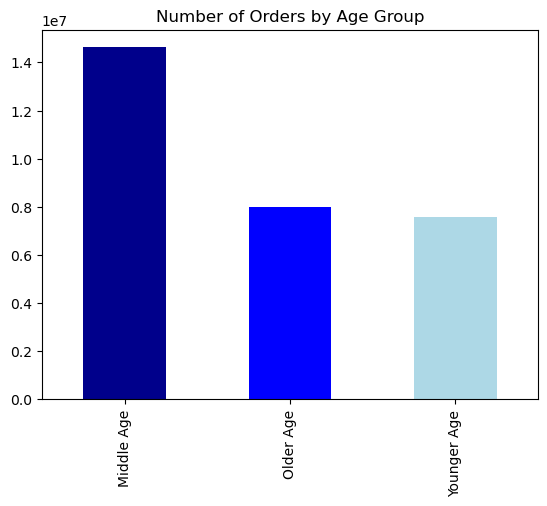

In [24]:
#Add color & title
age_groups_bar = df_all_high2['age_group_loc'].value_counts().plot.bar(color = ['darkblue', 'blue', 'lightblue'], title = 'Number of Orders by Age Group')

In [25]:
#Export Visualization
age_groups_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_groups_bar.png'))

Create visualization for income group variable

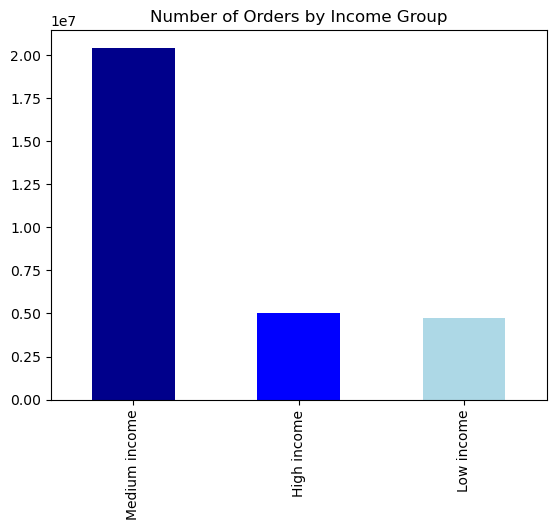

In [26]:
#Create bar graph for income variable
income_group_bar = df_all_high2['income_group_loc'].value_counts().plot.bar(color = ['darkblue', 'blue', 'lightblue'], title = 'Number of Orders by Income Group')

In [27]:
#Export income groups bar graph
income_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_bar.png'))

Create visualization for dependants

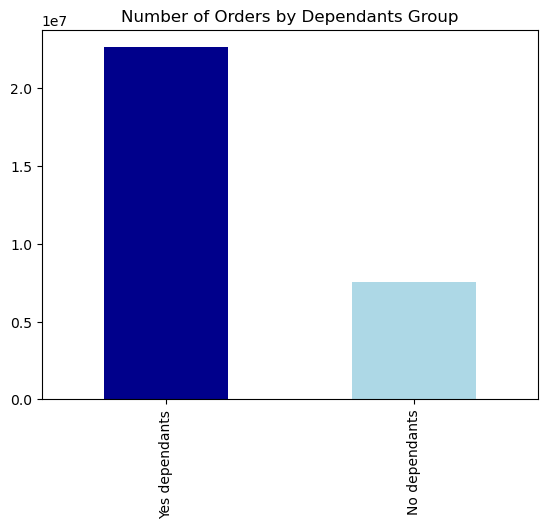

In [28]:
#Create bar graph for dep group
dependant_group_bar = df_all_high2['dep_group_loc'].value_counts().plot.bar(color = ['darkblue', 'lightblue'], title = 'Number of Orders by Dependants Group')

#Export dependants bar graph
dependant_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependant_group_bar.png'))

In [1]:
#Export df_all_high2 dataframe
df_all_high2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_high2.pkl'))

NameError: name 'df_all_high2' is not defined

#  7. Create customer-level profiles

In [4]:
#Import main dataframe
df_all_high3=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_high2.pkl'))

In [5]:
#Allow all columns to be shown to ensure no hidden PII
pd.options.display.max_columns=None

In [6]:
#Review the headers
df_all_high3.head(10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest_day,Busiest_period_of_day,max_order,loyalty_flag,ave_spend,spending_flag,median_order,frequency_flag,Gender,State,Age,date_joined,dependants,fam_status,income,Region,activity_loc,age_group_loc,income_group_loc,dep_group_loc
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Busiest_day,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,both,Mid-range product,Busiest_day,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,both,Mid-range product,Busiest_day,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants
9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants


In [10]:
#Create customer profile of young parents
df_all_high3.loc[(df_all_high3['age_group_loc'] == 'Younger Age') & (df_all_high3['dep_group_loc'] == 'Yes dependants'), 'cust_profile'] = 'Young_Parent'

In [12]:
#Create customer profile of Middle age parents
df_all_high3.loc[(df_all_high3['age_group_loc'] == 'Middle Age') & (df_all_high3['dep_group_loc'] == 'Yes dependants'), 'cust_profile'] = 'Middle_age_Parent'

In [13]:
#Create customer profile of Elderly parents
df_all_high3.loc[(df_all_high3['age_group_loc'] == 'Older Age') & (df_all_high3['dep_group_loc'] == 'Yes dependants'), 'cust_profile'] = 'Older Parent'

In [9]:
#Create customer profile of single customers by age group
df_all_high3.loc[(df_all_high3['age_group_loc'] == 'Younger Age') & (df_all_high3['fam_status'] == 'single'), 'cust_profile'] = 'Younger Single'

In [10]:
df_all_high3.loc[(df_all_high3['age_group_loc'] == 'Middle Age') & (df_all_high3['fam_status'] == 'single'), 'cust_profile'] = 'Middle Aged Single'

In [11]:
df_all_high3.loc[(df_all_high3['age_group_loc'] == 'Older Age') & (df_all_high3['fam_status'] == 'single'), 'cust_profile'] = 'Older Single'

# 8. Aggregate max, mean, min variables on a customer-profile level for usage & expenditure

In [14]:
#Aggregage age group to look at prices
df_all_high3.groupby('age_group_loc').agg({'prices':['min', 'mean', 'max']})

prices                
                 min      mean   max
age_group_loc                       
Middle Age       1.0  7.789932  25.0
Older Age        1.0  7.796007  25.0
Younger Age      1.0  7.783757  25.0

In [12]:
#Aggregate customer profile to look at prices
df_all_high3.groupby('cust_profile').agg({'prices':['min', 'mean', 'max']})

prices                
                      min      mean   max
cust_profile                             
Middle Aged Single    1.0  7.785432  25.0
Middle_age_Parent     1.0  7.790668  25.0
Older Parent          1.0  7.794149  25.0
Young_Parent          1.0  7.785557  25.0
Younger Single        1.0  7.778352  25.0

In [17]:
#Export df_all_high3 dataframe
df_all_high3.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_high3.pkl'))

Continue evaluation of customer profile field and aggregations

In [4]:
#Import df_all_high3 dataframe
df_all_high3=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'df_all_high3.pkl'))

In [5]:
#Evaluate NAN's in customer profile
df_all_high3.groupby('fam_status').agg({'dependants' : ['min', 'mean', 'max']})

dependants              
                                        min      mean max
fam_status                                               
divorced/widowed                          0  0.000000   0
living with parents and siblings          1  1.986320   3
married                                   1  2.003442   3
single                                    0  0.000000   0

In [6]:
#Allow all columns to be shown to ensure no hidden PII
pd.options.display.max_columns=None

In [7]:
#Evaluate cust_profile column with multiple tags
df_all_high3.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest_day,Busiest_period_of_day,max_order,loyalty_flag,ave_spend,spending_flag,median_order,frequency_flag,Gender,State,Age,date_joined,dependants,fam_status,income,Region,activity_loc,age_group_loc,income_group_loc,dep_group_loc,cust_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent


Create profile tags to indicate usage frequency by evaluating time between orders

In [13]:
#Aggregate customer profile to look at frequency usage
df_all_high3.groupby('cust_profile').agg({'days_since_prior_order':['min', 'mean', 'max']})

days_since_prior_order                 
                                      min       mean   max
cust_profile                                              
Middle Aged Single                    0.0  10.576035  30.0
Middle_age_Parent                     0.0  10.645999  30.0
Older Parent                          0.0  10.626185  30.0
Young_Parent                          0.0  10.648689  30.0
Younger Single                        0.0  10.714953  30.0

# 9. Compare customer profiles with regions and departments 

In [15]:
#Group customer profile with regions
profile_region = df_all_high3.groupby(['Region', 'cust_profile']).size().unstack(fill_value=0)

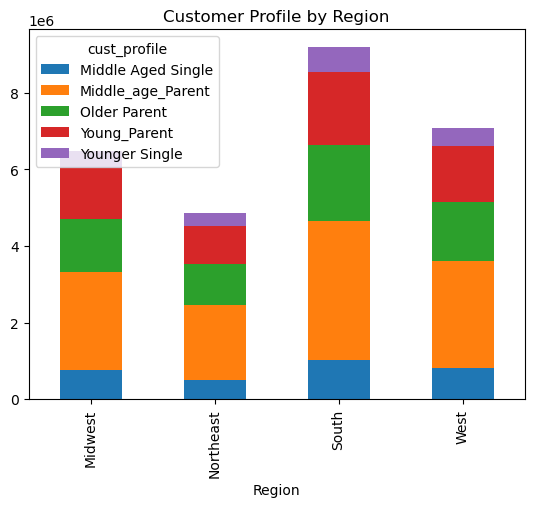

In [17]:
#Create a stacked bar chart
profile_region_bar = profile_region.plot.bar(stacked = True, title = 'Customer Profile by Region')

In [20]:
#Export stacked bar visualization
profile_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_region_bar.png'))

Unable to merge dataframes of departments with main dataframe due to RAM; will assign department names manually.

In [19]:
#Create department names variable in lieu of dept_id's
df_all_high3.loc[df_all_high3['department_id'] == 1, 'department'] = 'frozen'
df_all_high3.loc[df_all_high3['department_id'] == 2, 'department'] = 'other'
df_all_high3.loc[df_all_high3['department_id'] == 3, 'department'] = 'bakery'
df_all_high3.loc[df_all_high3['department_id'] == 4, 'department'] = 'produce'
df_all_high3.loc[df_all_high3['department_id'] == 5, 'department'] = 'alcohol'
df_all_high3.loc[df_all_high3['department_id'] == 6, 'department'] = 'international'
df_all_high3.loc[df_all_high3['department_id'] == 7, 'department'] = 'beverages'
df_all_high3.loc[df_all_high3['department_id'] == 8, 'department'] = 'pets'
df_all_high3.loc[df_all_high3['department_id'] == 9, 'department'] = 'dry goods-pasta'
df_all_high3.loc[df_all_high3['department_id'] == 10, 'department'] = 'bulk'
df_all_high3.loc[df_all_high3['department_id'] == 11, 'department'] = 'personal care'
df_all_high3.loc[df_all_high3['department_id'] == 12, 'department'] = 'meat-seafood'
df_all_high3.loc[df_all_high3['department_id'] == 13, 'department'] = 'pantry'
df_all_high3.loc[df_all_high3['department_id'] == 14, 'department'] = 'breakfast'
df_all_high3.loc[df_all_high3['department_id'] == 15, 'department'] = 'canned goods'
df_all_high3.loc[df_all_high3['department_id'] == 16, 'department'] = 'dairy-eggs'
df_all_high3.loc[df_all_high3['department_id'] == 17, 'department'] = 'household'
df_all_high3.loc[df_all_high3['department_id'] == 18, 'department'] = 'babies'
df_all_high3.loc[df_all_high3['department_id'] == 19, 'department'] = 'snacks'
df_all_high3.loc[df_all_high3['department_id'] == 20, 'department'] = 'deli'
df_all_high3.loc[df_all_high3['department_id'] == 21, 'department'] = 'missing'

In [21]:
df_all_high3.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest_day,Busiest_period_of_day,max_order,loyalty_flag,ave_spend,spending_flag,median_order,frequency_flag,Gender,State,Age,date_joined,dependants,fam_status,income,Region,activity_loc,age_group_loc,income_group_loc,dep_group_loc,cust_profile,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least_busy,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity customer,Younger Age,Low income,Yes dependants,Young_Parent,beverages


Create visualizations with depatment name

In [22]:
#Group customer profile with departments
profile_depts = df_all_high3.groupby(['department', 'cust_profile']).size().unstack(fill_value=0)

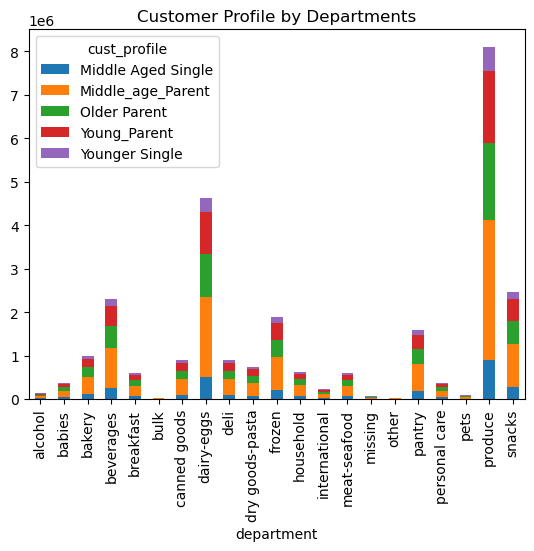

In [23]:
#Create a stacked bar chart
profile_depts_bar = profile_depts.plot.bar(stacked = True, title = 'Customer Profile by Departments')

In [24]:
#Export stacked bar visualization
profile_depts_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_depts_bar.png'))

Compare departments across regions

In [25]:
#Group customer profile with departments
region_depts = df_all_high3.groupby(['department', 'Region']).size().unstack(fill_value=0)

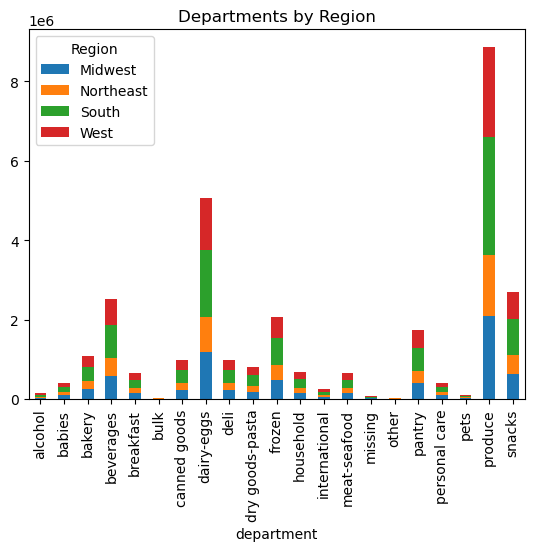

In [26]:
#Create a stacked bar chart
region_depts_bar = region_depts.plot.bar(stacked = True, title = 'Departments by Region')

In [27]:
#Export stacked bar visualization
region_depts_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_depts_bar.png'))

In [28]:
df_all_high3.shape

(30171424, 37)

In [29]:
#Export df_all_high3 dataframe
df_all_high3.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Orders_products_all_FINAL.pkl'))

In [6]:
#Import df_all_high3 dataframe
df_all_high3 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'Orders_products_all_FINAL.pkl'))

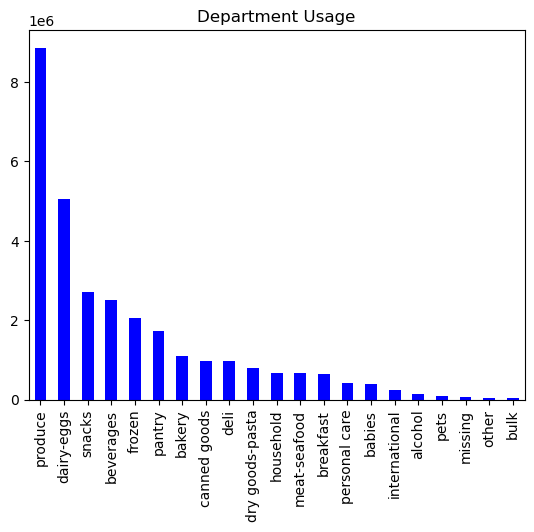

In [7]:
#Create simple bar graph of departments frequently used
dept_freq_bar = df_all_high3['department'].value_counts().plot.bar(color = 'blue', title = 'Department Usage')

In [8]:
#Export graph
dept_freq_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_freq_bar.png'))